In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
import math

In [2]:
data = pd.read_csv("EmployeeAttrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Analysing/Exploring dataset

In [3]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [4]:
data.shape

(1470, 35)

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
gender=data["Gender"].value_counts()
gender

Male      882
Female    588
Name: Gender, dtype: int64

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

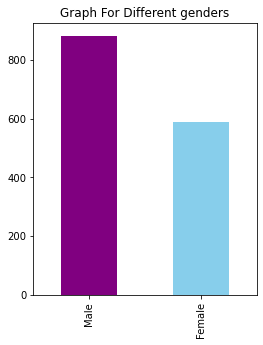

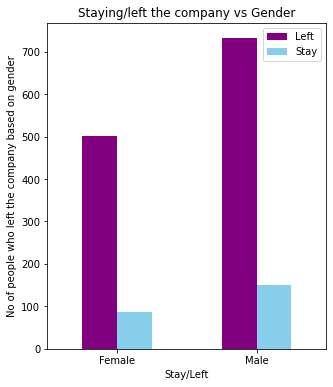

In [9]:
data['Gender'].value_counts().plot(kind='bar',color=['purple','skyblue'],title="Graph For Different genders",figsize=(4,5))
pd.crosstab(data['Gender'],data['Attrition']).plot(kind="bar",color=['purple','skyblue'],figsize=(5,6))
plt.title("Staying/left the company vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left the company based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [11]:
dep=data["Department"].value_counts()
dep

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

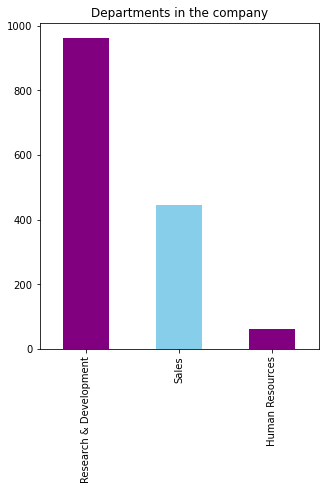

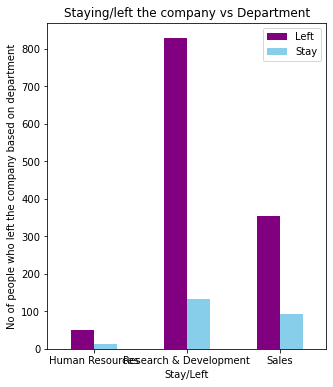

In [10]:
data['Department'].value_counts().plot(kind='bar',color=['purple','skyblue'],title="Departments in the company",figsize=(5,6))
pd.crosstab(data['Department'],data['Attrition']).plot(kind="bar",figsize=(5,6),color=['purple','skyblue'])
plt.title("Staying/left the company vs Department")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left the company based on department")
plt.legend(["Left","Stay"])
plt.xticks(rotation=360)

<AxesSubplot:title={'center':'Age group of the company'}>

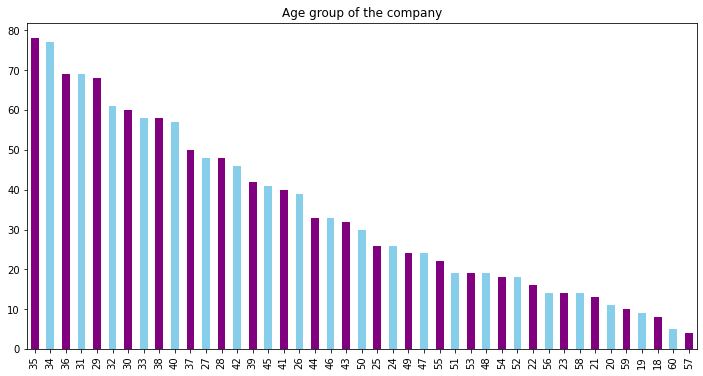

In [12]:
data['Age'].value_counts().plot(kind='bar',color=['purple','skyblue'],title="Age group of the company",figsize=(12,6))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  Text(37, 0, '55'),
  Text(38, 0, 

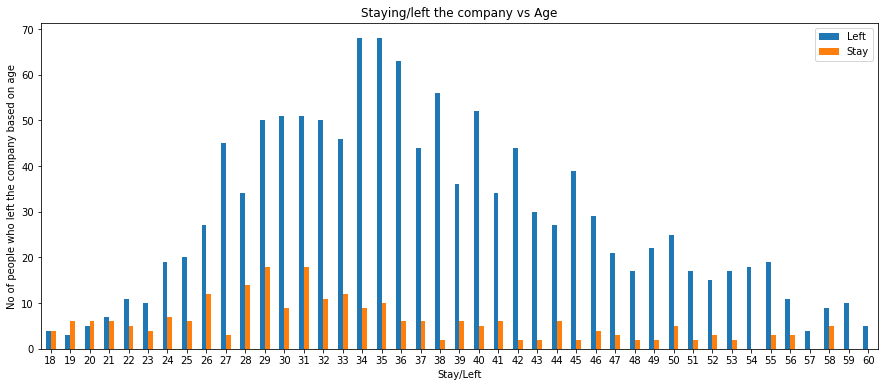

In [13]:
pd.crosstab(data['Age'],data['Attrition']).plot(kind="bar",figsize=(15,6))
plt.title("Staying/left the company vs Age")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left the company based on age")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [14]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [20]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop single-value columns and id columns
    df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
    
    # Binary-encode binary columns
    df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
    df['OverTime'] = df['OverTime'].replace({'No': 0, 'Yes': 1})
    df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})
    
    # Ordinal-encode the BusinessTravel column
    df['BusinessTravel'] = df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
    
    # One-hot encoding
    for column in ['Department', 'EducationField', 'JobRole', 'MaritalStatus']:
        df = onehot_encode(df, column=column)
    
    # Split df into X and y
    y = df['Attrition']
    X = df.drop('Attrition', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [21]:
#Training and testing data
X_train, X_test, y_train, y_test = preprocess_inputs(data)
X_train

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
99,0.762337,-2.005534,-0.816540,1.742140,0.092884,-0.669480,0.843888,0.055811,0.384204,-0.063108,...,2.128910,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165
785,0.326292,-0.141311,1.652087,1.366162,1.078220,-1.586784,0.843888,-0.239963,0.384204,0.838814,...,-0.469724,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165
918,1.525416,1.722911,-1.436773,-0.012423,0.092884,1.165128,0.843888,0.844541,0.384204,2.642657,...,-0.469724,3.915780,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,1.884966,-0.918742,-0.690165
1335,0.217281,-0.141311,0.035051,1.240836,1.078220,1.165128,0.843888,-1.225876,0.384204,-0.063108,...,-0.469724,-0.255377,-0.335309,-0.255377,2.017168,-0.533521,-0.237630,1.884966,-0.918742,-0.690165
1182,-0.109753,-2.005534,0.180264,-1.015031,1.078220,1.165128,-1.184992,-1.620241,-0.998124,-0.063108,...,-0.469724,-0.255377,2.982320,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.436787,1.722911,0.015361,-1.015031,1.078220,0.247824,-1.184992,0.893837,1.766532,-0.063108,...,-0.469724,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165
905,-0.872832,-0.141311,-0.311985,-1.015031,0.092884,1.165128,-1.184992,1.041724,-0.998124,1.740736,...,-0.469724,-0.255377,-0.335309,3.915780,-0.495745,-0.533521,-0.237630,1.884966,-0.918742,-0.690165
1096,0.326292,-0.141311,0.190109,-0.388401,-0.892452,0.247824,0.843888,-1.373763,0.384204,1.740736,...,-0.469724,3.915780,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,-0.918742,1.448930
235,0.653326,-0.141311,0.524838,0.864859,0.092884,1.165128,-1.184992,0.696654,0.384204,1.740736,...,-0.469724,3.915780,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165


In [22]:
y_train

99      0
785     0
918     0
1335    0
1182    0
       ..
715     0
905     0
1096    0
235     0
1061    0
Name: Attrition, Length: 1029, dtype: int64

In [25]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.


C:\Users\Inno\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Inno\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [26]:
#Choosing model
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 86.62%
                   K-Nearest Neighbors: 82.09%
                         Decision Tree: 78.00%
Support Vector Machine (Linear Kernel): 85.49%
   Support Vector Machine (RBF Kernel): 84.81%
                        Neural Network: 84.35%
                         Random Forest: 83.90%
                     Gradient Boosting: 85.49%


LogisticRegression()
[[352  12]
 [ 47  30]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       364
           1       0.71      0.39      0.50        77

    accuracy                           0.87       441
   macro avg       0.80      0.68      0.71       441
weighted avg       0.85      0.87      0.85       441

Accuracy: 0.866


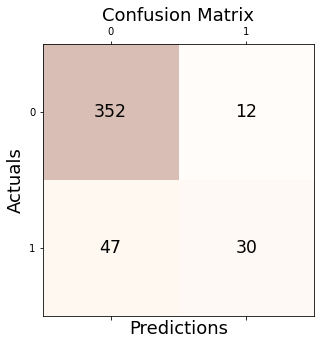

In [27]:
#Confusion matrix of Logistic Regression model
logmodel = LogisticRegression()
print(logmodel.fit(X_train, y_train) )

y_pred1 = logmodel.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred1))

# Print the confusion matrix using Matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

[[352  12]
 [ 48  29]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       364
           1       0.71      0.38      0.49        77

    accuracy                           0.86       441
   macro avg       0.79      0.67      0.71       441
weighted avg       0.85      0.86      0.85       441

Accuracy: 0.864


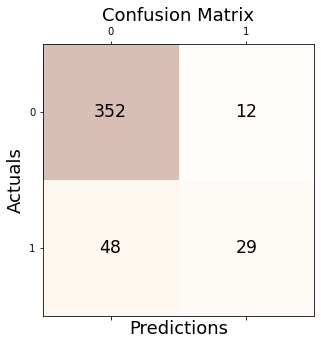

In [28]:
#Confusion matrix of Support Vector Machine(Linear Kernel) model
from sklearn.svm import SVC
Classifier = SVC (kernel='linear', random_state=0)
Classifier.fit (X_train, y_train)

y_pred2 = Classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred2))

# Print the confusion matrix using Matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

[[362   2]
 [ 65  12]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       364
           1       0.86      0.16      0.26        77

    accuracy                           0.85       441
   macro avg       0.85      0.58      0.59       441
weighted avg       0.85      0.85      0.80       441

Accuracy: 0.848


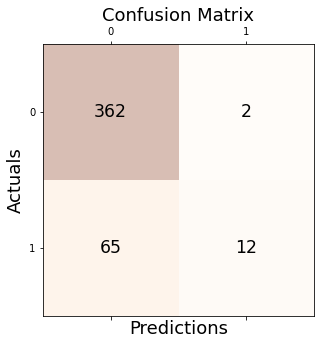

In [29]:
#Confusion matrix of Support Vector Machine(RBF Kernel) model
from sklearn.svm import SVC
Classifier = SVC (kernel='rbf', random_state=0)
Classifier.fit (X_train, y_train)

y_pred3 = Classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred3)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred3))

# Print the confusion matrix using Matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
def compute_tp_tn_fn_fp(y_test, y_pred):
    tp=sum((y_test == 1) & (y_pred == 1))
    tn=sum((y_test == 0) & (y_pred == 0))
    fn=sum((y_test == 1) & (y_pred == 0))
    fp =sum((y_test == 0) & (y_pred == 1))
    return tp, tn, fp, fn

In [65]:
#Calculating TP(Total Positive Value),TN(Total Negative Value),FP(False Positive Value),FN(False Negative Value)
#for Logistic Regression model

tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(y_test, y_pred1)
print('TP for Logistic Regression :', tp_lr)
print('TN for Logistic Regression :', tn_lr)
print('FP for Logistic Regression :', fp_lr)
print('FN for Logistic Regression :', fn_lr)

TP for Logistic Regression : 30
TN for Logistic Regression : 352
FP for Logistic Regression : 12
FN for Logistic Regression : 47


In [34]:
#Calculating TP(Total Positive Value),TN(Total Negative Value),FP(False Positive Value),FN(False Negative Value)
#for Support Vector Machine(Linear Kernel) model

tp_svml, tn_svml, fp_svml, fn_svml = compute_tp_tn_fn_fp(y_test, y_pred2)
print('TP for Support Vector Machine(Linear Kernel) model :', tp_svml)
print('TN for Support Vector Machine(Linear Kernel) model :', tn_svml)
print('FP for Support Vector Machine(Linear Kernel) model :', fp_svml)
print('FN for Support Vector Machine(Linear Kernel) model :', fn_svml)

TP for Support Vector Machine(Linear Kernel) model : 29
TN for Support Vector Machine(Linear Kernel) model : 352
FP for Support Vector Machine(Linear Kernel) model : 12
FN for Support Vector Machine(Linear Kernel) model : 48


In [35]:
#Calculating TP(Total Positive Value),TN(Total Negative Value),FP(False Positive Value),FN(False Negative Value)
#for Support Vector Machine(RBF Kernel) model

tp_svmr, tn_svmr, fp_svmr, fn_svmr = compute_tp_tn_fn_fp(y_test, y_pred3)
print('TP for Support Vector Machine(RBF Kernel) model :', tp_svmr)
print('TN for Support Vector Machine(RBF Kernel) model :', tn_svmr)
print('FP for Support Vector Machine(RBF Kernel) model :', fp_svmr)
print('FN for Support Vector Machine(RBF Kernel) model :', fn_svmr)

TP for Support Vector Machine(RBF Kernel) model : 12
TN for Support Vector Machine(RBF Kernel) model : 362
FP for Support Vector Machine(RBF Kernel) model : 2
FN for Support Vector Machine(RBF Kernel) model : 65


In [36]:
#Calculating Accuracy

print('Accuracy for Logistic Regression :', 100*accuracy_score(y_test, y_pred1))
print('Accuracy for Support Vector Machine(Linear Kernel) model :', 100*accuracy_score(y_test, y_pred2))
print('Accuracy for Support Vector Machine(RBF Kernel) model :', 100*accuracy_score(y_test, y_pred3))   

Accuracy for Logistic Regression : 86.62131519274377
Accuracy for Support Vector Machine(Linear Kernel) model : 86.39455782312925
Accuracy for Support Vector Machine(RBF Kernel) model : 84.80725623582767


In [49]:
a_lr=math.floor(accuracy_score(y_test, y_pred1)*100)
a_svml=math.floor(accuracy_score(y_test, y_pred2)*100)
a_svmr=math.floor(accuracy_score(y_test, y_pred3)*100)

In [37]:
#Calculating Precision

print('Precision for Logistic Regression :', 100* precision_score(y_test, y_pred1))
print('Precision for Support Vector Machine(Linear Kernel) model :', 100* precision_score(y_test, y_pred2))
print('Precision for Support Vector Machine(RBF Kernel) model :', 100*precision_score(y_test, y_pred3))   

Precision for Logistic Regression : 71.42857142857143
Precision for Support Vector Machine(Linear Kernel) model : 70.73170731707317
Precision for Support Vector Machine(RBF Kernel) model : 85.71428571428571


In [38]:
#Calculating Recall

print('Recall for Logistic Regression :', 100* recall_score(y_test, y_pred1))
print('Recall for Support Vector Machine(Linear Kernel) model :', 100* recall_score(y_test, y_pred2))
print('Recall for Support Vector Machine(RBF Kernel) model :', 100* recall_score(y_test, y_pred3))

Recall for Logistic Regression : 38.961038961038966
Recall for Support Vector Machine(Linear Kernel) model : 37.66233766233766
Recall for Support Vector Machine(RBF Kernel) model : 15.584415584415584


In [39]:
#Calculating F1_score

print('F1 score for Logistic Regression :', f1_score(y_test, y_pred1))
print('F1 score for Support Vector Machine(Linear Kernel) model :', f1_score(y_test, y_pred2))
print('F1 score for Support Vector Machine(RBF Kernel) model :', f1_score(y_test, y_pred3))

F1 score for Logistic Regression : 0.5042016806722689
F1 score for Support Vector Machine(Linear Kernel) model : 0.4915254237288135
F1 score for Support Vector Machine(RBF Kernel) model : 0.26373626373626374


In [48]:
f1_lr=math.floor(f1_score(y_test, y_pred1)*100)
f1_svml=math.floor(f1_score(y_test, y_pred2)*100)
f1_svmr=math.floor(f1_score(y_test, y_pred3)*100)

Text(0.5, 1.0, 'Models Vs Accuracy')

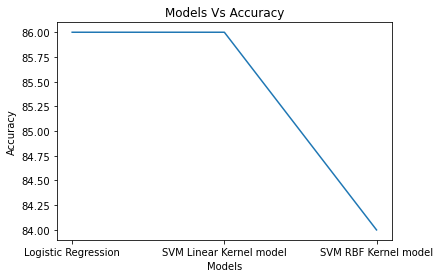

In [50]:
#Graph between model and accuracy

x=['Logistic Regression', 'SVM Linear Kernel model','SVM RBF Kernel model']
y=[a_lr, a_svml, a_svmr]
plt.plot(x, y)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models Vs Accuracy')

Text(0.5, 1.0, 'Models Vs F1_Score')

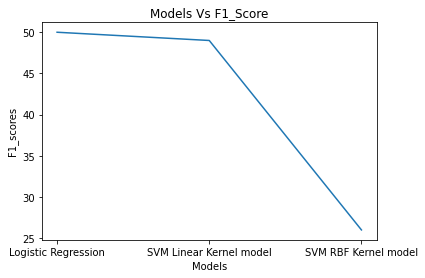

In [47]:
#Graph between model and F1_scores

x=['Logistic Regression', 'SVM Linear Kernel model','SVM RBF Kernel model']
y=[f1_lr, f1_svml, f1_svmr]
plt.plot(x, y)
plt.xlabel('Models')
plt.ylabel('F1_scores')
plt.title('Models Vs F1_Score')

In [63]:
#Example to show the accuracy of predictions of employee attrition

characteristic_dict=dict(zip(data.columns,list(logmodel.coef_[0])))
characteristic_dict

{'Age': -0.3260826939081251,
 'Attrition': 0.4611595989277241,
 'BusinessTravel': -0.16221752037720052,
 'DailyRate': 0.43704625417327464,
 'Department': 0.09031489074274253,
 'DistanceFromHome': -0.46444194783905574,
 'Education': 0.1693996226081028,
 'EducationField': 0.08312280236173179,
 'EmployeeCount': -0.31992301434626247,
 'EmployeeNumber': 0.1268657664844335,
 'EnvironmentSatisfaction': -0.283339598349285,
 'Gender': -0.059268098375331216,
 'HourlyRate': 0.07458330191319462,
 'JobInvolvement': 0.3389410390224457,
 'JobLevel': 0.8319700671775443,
 'JobRole': -0.08723729937980407,
 'JobSatisfaction': -0.05379654574453324,
 'MaritalStatus': -0.1733332977645172,
 'MonthlyIncome': -0.18723631073972546,
 'MonthlyRate': -0.3250606149642336,
 'NumCompaniesWorked': -0.22862795791419363,
 'Over18': -0.3397720708785684,
 'OverTime': 0.4701244109341639,
 'PercentSalaryHike': -0.4432969594766933,
 'PerformanceRating': 0.536328227110093,
 'RelationshipSatisfaction': -0.5423546391120876,
 'S

<AxesSubplot:title={'center':'characteristic Importance'}>

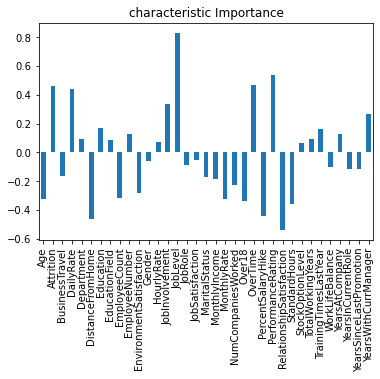

In [64]:
df=pd.DataFrame(characteristic_dict,index=[0])
df.T.plot(kind="bar",legend=False,title="characteristic Importance")

In [ ]:
From above graph, We can clearly infer that job level, overtime and PerformanceRating are the main reasons for employee 
attrition. So company should try to improve these areas so as to reduce attrition.